In [1]:
from __future__ import division
from numpy.random import randn
import numpy as np
import os
import matplotlib.pyplot as plt
np.random.seed(12345)
plt.rc('figure', figsize=(10, 6))
from pandas import Series, DataFrame
import pandas as pd
np.set_printoptions(precision=4)

In [2]:
%matplotlib inline

In [3]:
import matplotlib.pyplot as plt

## Plotting Maps: Visualizing Haiti Earthquake Crisis data

In [4]:
data = pd.read_csv('ch08/Haiti.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3593 entries, 0 to 3592
Data columns (total 10 columns):
Serial            3593 non-null int64
INCIDENT TITLE    3593 non-null object
INCIDENT DATE     3593 non-null object
LOCATION          3592 non-null object
DESCRIPTION       3593 non-null object
CATEGORY          3587 non-null object
LATITUDE          3593 non-null float64
LONGITUDE         3593 non-null float64
APPROVED          3593 non-null object
VERIFIED          3593 non-null object
dtypes: float64(2), int64(1), object(7)
memory usage: 280.8+ KB


In [5]:
data[:5]

,Serial,INCIDENT TITLE,INCIDENT DATE,LOCATION,DESCRIPTION,CATEGORY,LATITUDE,LONGITUDE,APPROVED,VERIFIED
0,4052,* URGENT * Type O blood donations needed in #J...,05/07/2010 17:26,"Jacmel, Haiti",Birthing Clinic in Jacmel #Haiti urgently need...,"1. Urgences | Emergency, 3. Public Health,",18.233333,-72.533333,YES,NO
1,4051,"Food-Aid sent to Fondwa, Haiti",28/06/2010 23:06,fondwa,Please help food-aid.org deliver more food to ...,"1. Urgences | Emergency, 2. Urgences logistiqu...",50.226029,5.729886,NO,NO
2,4050,how haiti is right now and how it was during t...,24/06/2010 16:21,centrie,i feel so bad for you i know i am supposed to ...,"2. Urgences logistiques | Vital Lines, 8. Autr...",22.278381,114.174287,NO,NO
3,4049,Lost person,20/06/2010 21:59,Genoca,We are family members of Juan Antonio Zuniga O...,"1. Urgences | Emergency,",44.407062,8.933989,NO,NO
4,4042,Citi Soleil school,18/05/2010 16:26,"Citi Soleil, Haiti",We are working with Haitian (NGO) -The Christi...,"1. Urgences | Emergency,",18.571084,-72.334671,YES,NO


In [6]:
data[['INCIDENT DATE', 'LATITUDE', 'LONGITUDE']][:10]

,INCIDENT DATE,LATITUDE,LONGITUDE
0,05/07/2010 17:26,18.233333,-72.533333
1,28/06/2010 23:06,50.226029,5.729886
2,24/06/2010 16:21,22.278381,114.174287
3,20/06/2010 21:59,44.407062,8.933989
4,18/05/2010 16:26,18.571084,-72.334671
5,26/04/2010 13:14,18.593707,-72.310079
6,26/04/2010 14:19,18.482800,-73.638800
7,26/04/2010 14:27,18.415000,-73.195000
8,15/03/2010 10:58,18.517443,-72.236841
9,15/03/2010 11:00,18.547790,-72.410010


In [7]:
data['CATEGORY'][:6]

0          1. Urgences | Emergency, 3. Public Health, 
1    1. Urgences | Emergency, 2. Urgences logistiqu...
2    2. Urgences logistiques | Vital Lines, 8. Autr...
3                            1. Urgences | Emergency, 
4                            1. Urgences | Emergency, 
5                       5e. Communication lines down, 
Name: CATEGORY, dtype: object

In [9]:
data.describe()
# 수치데이터, 명목데이터가 혼재되어 있을 경우 수치데이터에 대해서만 명시

,Serial,LATITUDE,LONGITUDE
count,3593.000000,3593.000000,3593.000000
mean,2080.277484,18.611495,-72.322680
std,1171.100360,0.738572,3.650776
min,4.000000,18.041313,-74.452757
25%,1074.000000,18.524070,-72.417500
50%,2163.000000,18.539269,-72.335000
75%,3088.000000,18.561820,-72.293570
max,4052.000000,50.226029,114.174287


In [10]:
data = data[(data.LATITUDE > 18) & (data.LATITUDE < 20) &
            (data.LONGITUDE > -75) & (data.LONGITUDE < -70)
            & data.CATEGORY.notnull()]

In [11]:
data[:5]

,Serial,INCIDENT TITLE,INCIDENT DATE,LOCATION,DESCRIPTION,CATEGORY,LATITUDE,LONGITUDE,APPROVED,VERIFIED
0,4052,* URGENT * Type O blood donations needed in #J...,05/07/2010 17:26,"Jacmel, Haiti",Birthing Clinic in Jacmel #Haiti urgently need...,"1. Urgences | Emergency, 3. Public Health,",18.233333,-72.533333,YES,NO
4,4042,Citi Soleil school,18/05/2010 16:26,"Citi Soleil, Haiti",We are working with Haitian (NGO) -The Christi...,"1. Urgences | Emergency,",18.571084,-72.334671,YES,NO
5,4041,Radio Commerce in Sarthe,26/04/2010 13:14,"Radio Commerce Shelter, Sarthe",i'm Louinel from Sarthe. I'd to know what can ...,"5e. Communication lines down,",18.593707,-72.310079,YES,NO
6,4040,Contaminated water in Baraderes.,26/04/2010 14:19,Marc near Baraderes,How do we treat water in areas without Pipe?\t...,"4. Menaces | Security Threats, 4e. Assainissem...",18.482800,-73.638800,YES,NO
7,4039,Violence at &quot;arcahaie bas Saint-Ard&quot;,26/04/2010 14:27,unable to find &quot;arcahaie bas Saint-Ard&qu...,Goodnight at (arcahaie bas Saint-Ard) 2 young ...,"4. Menaces | Security Threats,",18.415000,-73.195000,YES,NO


In [12]:
def to_cat_list(catstr):
    stripped = (x.strip() for x in catstr.split(','))
    return [x for x in stripped if x]

def get_all_categories(cat_series):
    cat_sets = (set(to_cat_list(x)) for x in cat_series)
    return sorted(set.union(*cat_sets))

def get_english(cat):
    code, names = cat.split('.')
    if '|' in names:
        names = names.split(' | ')[1]
    return code, names.strip()

In [13]:
get_english('2. Urgences logistiques | Vital Lines')

('2', 'Vital Lines')

In [14]:
all_cats = get_all_categories(data.CATEGORY)

# Generator expression
english_mapping = dict(get_english(x) for x in all_cats)
english_mapping['2a']
english_mapping['6c']

'Earthquake and aftershocks'

In [15]:
data.CATEGORY.head(5)

0          1. Urgences | Emergency, 3. Public Health, 
4                            1. Urgences | Emergency, 
5                       5e. Communication lines down, 
6    4. Menaces | Security Threats, 4e. Assainissem...
7                      4. Menaces | Security Threats, 
Name: CATEGORY, dtype: object

In [16]:
len(all_cats)

47

In [17]:
all_cats

['1. Urgences | Emergency',
 '1a. Highly vulnerable',
 '1b. Urgence medicale | Medical Emergency',
 '1c. Personnes prises au piege | People trapped',
 '1d. Incendie | Fire',
 '2. Urgences logistiques | Vital Lines',
 "2a. Penurie d'aliments | Food Shortage",
 "2b. Penurie d'eau | Water shortage",
 '2c. Eau contaminee | Contaminated water',
 '2c. Probleme de securite | Security Concern',
 '2d. Refuge | Shelter needed',
 '2e. Penurie de carburant | Fuel shortage',
 '2f. Sans courant | Power Outage',
 '3. Public Health',
 '3a. Infectious human disease',
 '3b. Chronic care needs',
 '3c. Besoins en materiels et medicaments | Medical equipment and supply needs',
 "3d. OBGYN/Women's Health",
 '3e. Psychiatric need',
 '4. Menaces | Security Threats',
 '4a. Pillage | Looting',
 '4c. Group violence',
 '4e. Assainissement eau et hygiene | Water sanitation and hygiene promotion',
 '5. Infrastructure Damage',
 '5a. Structure effondres | Collapsed structure',
 '5b. Structures a risque | Unstable Str

In [18]:
def get_code(seq):
    return [x.split('.')[0] for x in seq if x]

all_codes = get_code(all_cats)
code_index = pd.Index(np.unique(all_codes))
dummy_frame = DataFrame(np.zeros((len(data), len(code_index))),
                        index=data.index, columns=code_index)

In [22]:
dummy_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3569 entries, 0 to 3592
Data columns (total 45 columns):
1     3569 non-null float64
1a    3569 non-null float64
1b    3569 non-null float64
1c    3569 non-null float64
1d    3569 non-null float64
2     3569 non-null float64
2a    3569 non-null float64
2b    3569 non-null float64
2c    3569 non-null float64
2d    3569 non-null float64
2e    3569 non-null float64
2f    3569 non-null float64
3     3569 non-null float64
3a    3569 non-null float64
3b    3569 non-null float64
3c    3569 non-null float64
3d    3569 non-null float64
3e    3569 non-null float64
4     3569 non-null float64
4a    3569 non-null float64
4c    3569 non-null float64
4e    3569 non-null float64
5     3569 non-null float64
5a    3569 non-null float64
5b    3569 non-null float64
5c    3569 non-null float64
5d    3569 non-null float64
5e    3569 non-null float64
6     3569 non-null float64
6a    3569 non-null float64
6b    3569 non-null float64
6c    3569 non-null float

In [23]:
dummy_frame.head()

,1,1a,1b,1c,1d,2,2a,2b,2c,2d,...,7c,7d,7g,7h,8,8a,8c,8d,8e,8f
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
dummy_frame.iloc[:, :6].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3569 entries, 0 to 3592
Data columns (total 6 columns):
1     3569 non-null float64
1a    3569 non-null float64
1b    3569 non-null float64
1c    3569 non-null float64
1d    3569 non-null float64
2     3569 non-null float64
dtypes: float64(6)
memory usage: 195.2 KB


In [25]:
data.index[:5]

Int64Index([0, 4, 5, 6, 7], dtype='int64')

In [26]:
data.CATEGORY.head()

0          1. Urgences | Emergency, 3. Public Health, 
4                            1. Urgences | Emergency, 
5                       5e. Communication lines down, 
6    4. Menaces | Security Threats, 4e. Assainissem...
7                      4. Menaces | Security Threats, 
Name: CATEGORY, dtype: object

In [27]:
for row, cat in zip(data.index, data.CATEGORY):
    codes = get_code(to_cat_list(cat))
    dummy_frame.loc[row, codes] = 1

data = data.join(dummy_frame.add_prefix('category_'))

In [28]:
data.head(5)

,Serial,INCIDENT TITLE,INCIDENT DATE,LOCATION,DESCRIPTION,CATEGORY,LATITUDE,LONGITUDE,APPROVED,VERIFIED,...,category_7c,category_7d,category_7g,category_7h,category_8,category_8a,category_8c,category_8d,category_8e,category_8f
0,4052,* URGENT * Type O blood donations needed in #J...,05/07/2010 17:26,"Jacmel, Haiti",Birthing Clinic in Jacmel #Haiti urgently need...,"1. Urgences | Emergency, 3. Public Health,",18.233333,-72.533333,YES,NO,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4042,Citi Soleil school,18/05/2010 16:26,"Citi Soleil, Haiti",We are working with Haitian (NGO) -The Christi...,"1. Urgences | Emergency,",18.571084,-72.334671,YES,NO,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4041,Radio Commerce in Sarthe,26/04/2010 13:14,"Radio Commerce Shelter, Sarthe",i'm Louinel from Sarthe. I'd to know what can ...,"5e. Communication lines down,",18.593707,-72.310079,YES,NO,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,4040,Contaminated water in Baraderes.,26/04/2010 14:19,Marc near Baraderes,How do we treat water in areas without Pipe?\t...,"4. Menaces | Security Threats, 4e. Assainissem...",18.482800,-73.638800,YES,NO,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,4039,Violence at &quot;arcahaie bas Saint-Ard&quot;,26/04/2010 14:27,unable to find &quot;arcahaie bas Saint-Ard&qu...,Goodnight at (arcahaie bas Saint-Ard) 2 young ...,"4. Menaces | Security Threats,",18.415000,-73.195000,YES,NO,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
data.iloc[:, 10:15].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3569 entries, 0 to 3592
Data columns (total 5 columns):
category_1     3569 non-null float64
category_1a    3569 non-null float64
category_1b    3569 non-null float64
category_1c    3569 non-null float64
category_1d    3569 non-null float64
dtypes: float64(5)
memory usage: 327.3 KB


---

# Data Aggregation and Group Operations

## GroupBy mechanics

In [30]:
from __future__ import division
from numpy.random import randn
import numpy as np
import os
import matplotlib.pyplot as plt
np.random.seed(12345)
plt.rc('figure', figsize=(10, 6))
from pandas import Series, DataFrame
import pandas as pd
np.set_printoptions(precision=4)

In [31]:
pd.options.display.notebook_repr_html = False

In [32]:
%matplotlib inline

In [56]:
from IPython.core.interactiveshell import InteractiveShell

In [57]:
InteractiveShell.ast_node_interactivity = 'all'

In [130]:
df = DataFrame({'key1' : ['a', 'a', 'b', 'b', 'a'],
                'key2' : ['one', 'two', 'one', 'two', 'one'],
                'data1' : np.random.randint(10,size=(5)),
                'data2' : np.random.randint(10,size=(5))})
df

   data1  data2 key1 key2
0      0      2    a  one
1      7      4    a  two
2      1      5    b  one
3      6      1    b  two
4      7      3    a  one

In [131]:
grouped = df['data1'].groupby(df['key1'])
grouped

In [132]:
grouped.mean()

key1
a    4.666667
b    3.500000
Name: data1, dtype: float64

In [133]:
means = df['data1'].groupby([df['key1'], df['key2']]).mean()
means

key1  key2
a     one     3.5
      two     7.0
b     one     1.0
      two     6.0
Name: data1, dtype: float64

In [134]:
means.unstack()

key2  one  two
key1          
a     3.5  7.0
b     1.0  6.0

In [135]:
states = np.array(['Ohio', 'California', 'California', 'Ohio', 'Ohio'])
years = np.array([2005, 2005, 2006, 2005, 2006])
df['data1'].groupby([states, years]).mean()

California  2005    7
            2006    1
Ohio        2005    3
            2006    7
Name: data1, dtype: int32

In [136]:
df.groupby('key1').mean()

         data1  data2
key1                 
a     4.666667    3.0
b     3.500000    3.0

In [137]:
df.groupby(['key1', 'key2']).mean()

           data1  data2
key1 key2              
a    one     3.5    2.5
     two     7.0    4.0
b    one     1.0    5.0
     two     6.0    1.0

In [138]:
df.groupby(['key1', 'key2']).size()

key1  key2
a     one     2
      two     1
b     one     1
      two     1
dtype: int64

## Iterating over groups

In [139]:
for name, group in df.groupby('key1'):
    print(name)
    print(group)

a
   data1  data2 key1 key2
0      0      2    a  one
1      7      4    a  two
4      7      3    a  one
b
   data1  data2 key1 key2
2      1      5    b  one
3      6      1    b  two


In [140]:
for (k1, k2), group in df.groupby(['key1', 'key2']):
    print((k1, k2))
    print(group)

('a', 'one')
   data1  data2 key1 key2
0      0      2    a  one
4      7      3    a  one
('a', 'two')
   data1  data2 key1 key2
1      7      4    a  two
('b', 'one')
   data1  data2 key1 key2
2      1      5    b  one
('b', 'two')
   data1  data2 key1 key2
3      6      1    b  two


In [141]:
pieces = dict(list(df.groupby('key1')))
pieces['b']

   data1  data2 key1 key2
2      1      5    b  one
3      6      1    b  two

In [142]:
df.dtypes

data1     int32
data2     int32
key1     object
key2     object
dtype: object

In [143]:
grouped = df.groupby(df.dtypes, axis=1)
dict(list(grouped))

{dtype('int32'):    data1  data2
 0      0      2
 1      7      4
 2      1      5
 3      6      1
 4      7      3, dtype('O'):   key1 key2
 0    a  one
 1    a  two
 2    b  one
 3    b  two
 4    a  one}

## Selecting a column or subset of columns

In [144]:
df.groupby('key1')['data1']
df.groupby('key1')[['data2']]

In [145]:
df['data1'].groupby(df['key1'])
df[['data2']].groupby(df['key1'])

In [146]:
df.groupby(['key1', 'key2'])[['data2']].mean()

           data2
key1 key2       
a    one     2.5
     two     4.0
b    one     5.0
     two     1.0

In [147]:
s_grouped = df.groupby(['key1', 'key2'])['data2']
s_grouped

In [148]:
s_grouped.mean()

key1  key2
a     one     2.5
      two     4.0
b     one     5.0
      two     1.0
Name: data2, dtype: float64

## Grouping with dicts and Series

In [149]:
people = DataFrame(np.random.randint(3, size=(5, 5)),
                   columns=['a', 'b', 'c', 'd', 'e'],
                   index=['Joe', 'Steve', 'Wes', 'Jim', 'Travis'])
people.loc[2:3, ['b', 'c']] = np.nan # Add a few NA values
# 레이블이 String으로 되어 있어 자체적으로 2:3을 명확히 위치 기반으로 인식하여
# 3번째(2의 위치)에 있는 b,c열의 값을 NaN으로 변경
people

        a    b    c  d  e
Joe     0  2.0  0.0  0  1
Steve   1  2.0  2.0  1  2
Wes     2  NaN  NaN  2  0
Jim     0  2.0  2.0  0  1
Travis  2  0.0  0.0  2  1

In [150]:
mapping = {'a': 'red', 'b': 'red', 'c': 'blue',
           'd': 'blue', 'e': 'red', 'f' : 'orange'}

In [151]:
by_column = people.groupby(mapping, axis=1)
by_column.sum()

        blue  red
Joe      0.0  3.0
Steve    3.0  5.0
Wes      2.0  2.0
Jim      2.0  3.0
Travis   2.0  3.0

In [152]:
map_series = Series(mapping)
map_series

a       red
b       red
c      blue
d      blue
e       red
f    orange
dtype: object

In [153]:
people.groupby(map_series, axis=1).count()

        blue  red
Joe        2    3
Steve      2    3
Wes        1    2
Jim        2    3
Travis     2    3

## Grouping with functions

In [154]:
people.groupby(len).sum()

   a    b    c  d  e
3  2  4.0  2.0  2  2
5  1  2.0  2.0  1  2
6  2  0.0  0.0  2  1

In [155]:
key_list = ['one', 'one', 'one', 'two', 'two']
people.groupby([len, key_list]).min()

       a    b    c  d  e
3 one  0  2.0  0.0  0  0
  two  0  2.0  2.0  0  1
5 one  1  2.0  2.0  1  2
6 two  2  0.0  0.0  2  1

## Grouping by index levels

In [156]:
columns = pd.MultiIndex.from_arrays([['US', 'US', 'US', 'JP', 'JP'],
                                    [1, 3, 5, 1, 3]], names=['cty', 'tenor'])
hier_df = DataFrame(np.random.randn(4, 5), columns=columns)
hier_df

cty          US                            JP          
tenor         1         3         5         1         3
0     -0.555068 -0.870785 -0.222113  1.309442 -0.770357
1     -2.385938  0.737263 -0.949771  0.698024  0.237642
2     -1.609557 -0.028045  1.108146  1.349976  0.586494
3      1.338035  1.002753  1.219548  0.866351 -0.034341

In [157]:
hier_df.groupby(level='cty', axis=1).count()

cty  JP  US
0     2   3
1     2   3
2     2   3
3     2   3

## Data aggregation

In [158]:
df

   data1  data2 key1 key2
0      0      2    a  one
1      7      4    a  two
2      1      5    b  one
3      6      1    b  two
4      7      3    a  one

In [159]:
grouped = df.groupby('key1')
grouped['data1'].quantile(0.9)
grouped.quantile(0.9)['data1']

key1
a    7.0
b    5.5
Name: data1, dtype: float64

key1
a    7.0
b    5.5
Name: data1, dtype: float64

In [160]:
def peak_to_peak(arr):
    return arr.max() - arr.min()
grouped.agg(peak_to_peak)

      data1  data2
key1              
a         7      2
b         5      4

In [161]:
grouped.describe()

     data1                                                data2       \
     count      mean       std  min   25%  50%   75%  max count mean   
key1                                                                   
a      3.0  4.666667  4.041452  0.0  3.50  7.0  7.00  7.0   3.0  3.0   
b      2.0  3.500000  3.535534  1.0  2.25  3.5  4.75  6.0   2.0  3.0   

                                         
           std  min  25%  50%  75%  max  
key1                                     
a     1.000000  2.0  2.5  3.0  3.5  4.0  
b     2.828427  1.0  2.0  3.0  4.0  5.0  

## Column-wise and multiple function application

In [163]:
tips = pd.read_csv('ch08/tips.csv')
# Add tip percentage of total bill
tips['tip_pct'] = tips['tip'] / tips['total_bill']
tips[:6]

   total_bill   tip     sex smoker  day    time  size   tip_pct
0       16.99  1.01  Female     No  Sun  Dinner     2  0.059447
1       10.34  1.66    Male     No  Sun  Dinner     3  0.160542
2       21.01  3.50    Male     No  Sun  Dinner     3  0.166587
3       23.68  3.31    Male     No  Sun  Dinner     2  0.139780
4       24.59  3.61  Female     No  Sun  Dinner     4  0.146808
5       25.29  4.71    Male     No  Sun  Dinner     4  0.186240

In [169]:
grouped = tips.groupby(['sex', 'smoker'])

for (sex, smoker), group in grouped:
        print(sex, smoker)
        print(group)

Female No
     total_bill   tip     sex smoker   day    time  size   tip_pct
0         16.99  1.01  Female     No   Sun  Dinner     2  0.059447
4         24.59  3.61  Female     No   Sun  Dinner     4  0.146808
11        35.26  5.00  Female     No   Sun  Dinner     4  0.141804
14        14.83  3.02  Female     No   Sun  Dinner     2  0.203641
16        10.33  1.67  Female     No   Sun  Dinner     3  0.161665
18        16.97  3.50  Female     No   Sun  Dinner     3  0.206246
21        20.29  2.75  Female     No   Sat  Dinner     2  0.135535
22        15.77  2.23  Female     No   Sat  Dinner     2  0.141408
29        19.65  3.00  Female     No   Sat  Dinner     2  0.152672
32        15.06  3.00  Female     No   Sat  Dinner     2  0.199203
33        20.69  2.45  Female     No   Sat  Dinner     4  0.118415
37        16.93  3.07  Female     No   Sat  Dinner     3  0.181335
51        10.29  2.60  Female     No   Sun  Dinner     2  0.252672
52        34.81  5.20  Female     No   Sun  Dinner  

In [165]:
grouped_pct = grouped['tip_pct']
grouped_pct.agg('mean')

sex     smoker
Female  No        0.156921
        Yes       0.182150
Male    No        0.160669
        Yes       0.152771
Name: tip_pct, dtype: float64

In [170]:
grouped_pct.agg(['mean', 'std', peak_to_peak])

                   mean       std  peak_to_peak
sex    smoker                                  
Female No      0.156921  0.036421      0.195876
       Yes     0.182150  0.071595      0.360233
Male   No      0.160669  0.041849      0.220186
       Yes     0.152771  0.090588      0.674707

In [171]:
grouped_pct.agg([('foo', 'mean'), ('bar', np.std)])

                    foo       bar
sex    smoker                    
Female No      0.156921  0.036421
       Yes     0.182150  0.071595
Male   No      0.160669  0.041849
       Yes     0.152771  0.090588

In [172]:
functions = ['count', 'mean', 'max']
result = grouped['tip_pct', 'total_bill'].agg(functions)
result

              tip_pct                     total_bill                  
                count      mean       max      count       mean    max
sex    smoker                                                         
Female No          54  0.156921  0.252672         54  18.105185  35.83
       Yes         33  0.182150  0.416667         33  17.977879  44.30
Male   No          97  0.160669  0.291990         97  19.791237  48.33
       Yes         60  0.152771  0.710345         60  22.284500  50.81

In [173]:
result['tip_pct']

               count      mean       max
sex    smoker                           
Female No         54  0.156921  0.252672
       Yes        33  0.182150  0.416667
Male   No         97  0.160669  0.291990
       Yes        60  0.152771  0.710345

In [174]:
ftuples = [('Durchschnitt', 'mean'), ('Abweichung', np.var)]
grouped['tip_pct', 'total_bill'].agg(ftuples)

                   tip_pct              total_bill           
              Durchschnitt Abweichung Durchschnitt Abweichung
sex    smoker                                                
Female No         0.156921   0.001327    18.105185  53.092422
       Yes        0.182150   0.005126    17.977879  84.451517
Male   No         0.160669   0.001751    19.791237  76.152961
       Yes        0.152771   0.008206    22.284500  98.244673

In [175]:
grouped.agg({'tip' : np.max, 'size' : 'sum'})

                tip  size
sex    smoker            
Female No       5.2   140
       Yes      6.5    74
Male   No       9.0   263
       Yes     10.0   150

In [177]:
grouped.agg({'tip_pct' : ['min', 'max', 'mean', 'std'],
             'size' : 'sum'})

                tip_pct                               size
                    min       max      mean       std  sum
sex    smoker                                             
Female No      0.056797  0.252672  0.156921  0.036421  140
       Yes     0.056433  0.416667  0.182150  0.071595   74
Male   No      0.071804  0.291990  0.160669  0.041849  263
       Yes     0.035638  0.710345  0.152771  0.090588  150

 ## Returning aggreated data in "unindexed" form

In [178]:
tips.groupby(['sex', 'smoker'], as_index=False).mean()

      sex smoker  total_bill       tip      size   tip_pct
0  Female     No   18.105185  2.773519  2.592593  0.156921
1  Female    Yes   17.977879  2.931515  2.242424  0.182150
2    Male     No   19.791237  3.113402  2.711340  0.160669
3    Male    Yes   22.284500  3.051167  2.500000  0.152771

### 여성 흡연자/비흡연자, 남성 흡연자/비흡연자  
### 팁 비율을 막대그래프로 나타내 보세요

In [182]:
grouped['tip_pct'].agg('mean').unstack()

smoker        No       Yes
sex                       
Female  0.156921  0.182150
Male    0.160669  0.152771

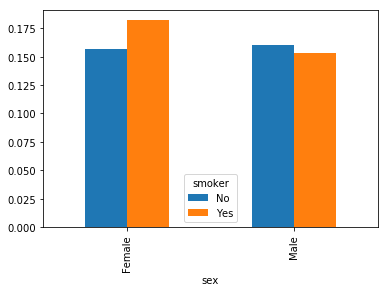

In [186]:
fig = plt.figure()
grouped['tip_pct'].agg('mean').unstack().plot(kind='bar')

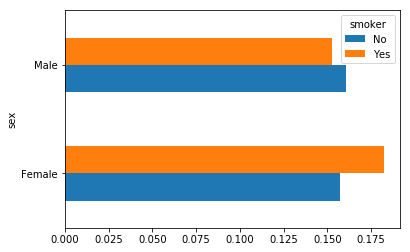

In [187]:
tips.groupby(['sex', 'smoker'])['tip_pct'].mean().unstack().plot(kind='barh')

### 여성/남성 흡연/비흡연자의 음식값과 팁비율을 산포도로
### 나타내 보세요

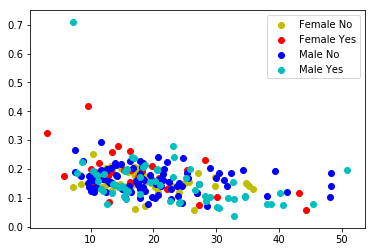

In [213]:
tip_f = tips[tips['sex'] == 'Female']
tip_fn = tip_f[tip_f['smoker'] == 'No']
tip_fy = tip_f[tip_f['smoker'] == 'Yes']
tip_m = tips[tips['sex'] == 'Male']
tip_mn = tip_m[tip_m['smoker'] == 'No']
tip_my = tip_m[tip_m['smoker'] == 'Yes']

plt.scatter(tip_fn['total_bill'], tip_fn['tip_pct'], label='Female No', color ='y');
plt.scatter(tip_fy['total_bill'], tip_fy['tip_pct'], label='Female Yes', color ='r');
plt.scatter(tip_mn['total_bill'], tip_mn['tip_pct'], label='Male No', color='b');
plt.scatter(tip_my['total_bill'], tip_my['tip_pct'], label='Male Yes', color='c');
plt.legend(loc='best');

In [199]:
tip_m = tips[tips['sex'] == 'Male']
tip_mn = tip_m[tip_m['smoker'] == 'No']
tip_my = tip_m[tip_m['smoker'] == 'Yes']

In [197]:
tip_f = tips[tips['sex'] == 'Female']
tip_fn = tip_f[tip_f['smoker'] == 'No']
tip_fy = tip_f[tip_f['smoker'] == 'Yes']

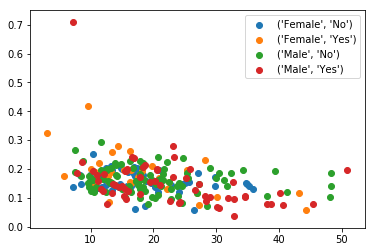

In [221]:
g = tips.groupby(['sex', 'smoker'])

for i in g.groups:
    plt.scatter(y=g.get_group(i)['tip_pct'], x=g.get_group(i)['total_bill'], label=i)
plt.legend();

## Group-wise operations and transformations

In [222]:
df

   data1  data2 key1 key2
0      0      2    a  one
1      7      4    a  two
2      1      5    b  one
3      6      1    b  two
4      7      3    a  one

In [223]:
k1_means = df.groupby('key1').mean().add_prefix('mean_')
k1_means

      mean_data1  mean_data2
key1                        
a       4.666667         3.0
b       3.500000         3.0

In [224]:
pd.merge(df, k1_means, left_on='key1', right_index=True)

   data1  data2 key1 key2  mean_data1  mean_data2
0      0      2    a  one    4.666667         3.0
1      7      4    a  two    4.666667         3.0
4      7      3    a  one    4.666667         3.0
2      1      5    b  one    3.500000         3.0
3      6      1    b  two    3.500000         3.0

In [225]:
key = ['one', 'two', 'one', 'two', 'one']
people.groupby(key).mean()

            a    b    c         d         e
one  1.333333  1.0  0.0  1.333333  0.666667
two  0.500000  2.0  2.0  0.500000  1.500000

In [226]:
people.groupby(key).transform(np.mean)

               a    b    c         d         e
Joe     1.333333  1.0  0.0  1.333333  0.666667
Steve   0.500000  2.0  2.0  0.500000  1.500000
Wes     1.333333  1.0  0.0  1.333333  0.666667
Jim     0.500000  2.0  2.0  0.500000  1.500000
Travis  1.333333  1.0  0.0  1.333333  0.666667

In [227]:
def demean(arr):
    return arr - arr.mean()
demeaned = people.groupby(key).transform(demean)
demeaned

               a    b    c         d         e
Joe    -1.333333  1.0  0.0 -1.333333  0.333333
Steve   0.500000  0.0  0.0  0.500000  0.500000
Wes     0.666667  NaN  NaN  0.666667 -0.666667
Jim    -0.500000  0.0  0.0 -0.500000 -0.500000
Travis  0.666667 -1.0  0.0  0.666667  0.333333

In [228]:
demeaned.groupby(key).mean()

                a    b    c             d             e
one  7.401487e-17  0.0  0.0  7.401487e-17  3.700743e-17
two  0.000000e+00  0.0  0.0  0.000000e+00  0.000000e+00

## Apply: General split-apply-combine

In [230]:
tips[:10]
def top(df, n=5, column='tip_pct'):
    return df.sort_values(by=column)[-n:]
top(tips, n=6)

   total_bill   tip     sex smoker  day    time  size   tip_pct
0       16.99  1.01  Female     No  Sun  Dinner     2  0.059447
1       10.34  1.66    Male     No  Sun  Dinner     3  0.160542
2       21.01  3.50    Male     No  Sun  Dinner     3  0.166587
3       23.68  3.31    Male     No  Sun  Dinner     2  0.139780
4       24.59  3.61  Female     No  Sun  Dinner     4  0.146808
5       25.29  4.71    Male     No  Sun  Dinner     4  0.186240
6        8.77  2.00    Male     No  Sun  Dinner     2  0.228050
7       26.88  3.12    Male     No  Sun  Dinner     4  0.116071
8       15.04  1.96    Male     No  Sun  Dinner     2  0.130319
9       14.78  3.23    Male     No  Sun  Dinner     2  0.218539

     total_bill   tip     sex smoker  day    time  size   tip_pct
109       14.31  4.00  Female    Yes  Sat  Dinner     2  0.279525
183       23.17  6.50    Male    Yes  Sun  Dinner     4  0.280535
232       11.61  3.39    Male     No  Sat  Dinner     2  0.291990
67         3.07  1.00  Female    Yes  Sat  Dinner     1  0.325733
178        9.60  4.00  Female    Yes  Sun  Dinner     2  0.416667
172        7.25  5.15    Male    Yes  Sun  Dinner     2  0.710345

In [231]:
tips.groupby('smoker').apply(top)

            total_bill   tip     sex smoker   day    time  size   tip_pct
smoker                                                                   
No     88        24.71  5.85    Male     No  Thur   Lunch     2  0.236746
       185       20.69  5.00    Male     No   Sun  Dinner     5  0.241663
       51        10.29  2.60  Female     No   Sun  Dinner     2  0.252672
       149        7.51  2.00    Male     No  Thur   Lunch     2  0.266312
       232       11.61  3.39    Male     No   Sat  Dinner     2  0.291990
Yes    109       14.31  4.00  Female    Yes   Sat  Dinner     2  0.279525
       183       23.17  6.50    Male    Yes   Sun  Dinner     4  0.280535
       67         3.07  1.00  Female    Yes   Sat  Dinner     1  0.325733
       178        9.60  4.00  Female    Yes   Sun  Dinner     2  0.416667
       172        7.25  5.15    Male    Yes   Sun  Dinner     2  0.710345

In [233]:
tips.groupby(['smoker', 'day']).apply(top, n=2, column='total_bill')
tips.groupby(['smoker', 'day']).apply(top, n=1, column='total_bill')

                 total_bill    tip     sex smoker   day    time  size  \
smoker day                                                              
No     Fri  91        22.49   3.50    Male     No   Fri  Dinner     2   
            94        22.75   3.25  Female     No   Fri  Dinner     2   
       Sat  59        48.27   6.73    Male     No   Sat  Dinner     4   
            212       48.33   9.00    Male     No   Sat  Dinner     4   
       Sun  112       38.07   4.00    Male     No   Sun  Dinner     3   
            156       48.17   5.00    Male     No   Sun  Dinner     6   
       Thur 85        34.83   5.17  Female     No  Thur   Lunch     4   
            142       41.19   5.00    Male     No  Thur   Lunch     5   
Yes    Fri  90        28.97   3.00    Male    Yes   Fri  Dinner     2   
            95        40.17   4.73    Male    Yes   Fri  Dinner     4   
       Sat  102       44.30   2.50  Female    Yes   Sat  Dinner     3   
            170       50.81  10.00    Male    Yes  

                 total_bill    tip     sex smoker   day    time  size  \
smoker day                                                              
No     Fri  94        22.75   3.25  Female     No   Fri  Dinner     2   
       Sat  212       48.33   9.00    Male     No   Sat  Dinner     4   
       Sun  156       48.17   5.00    Male     No   Sun  Dinner     6   
       Thur 142       41.19   5.00    Male     No  Thur   Lunch     5   
Yes    Fri  95        40.17   4.73    Male    Yes   Fri  Dinner     4   
       Sat  170       50.81  10.00    Male    Yes   Sat  Dinner     3   
       Sun  182       45.35   3.50    Male    Yes   Sun  Dinner     3   
       Thur 197       43.11   5.00  Female    Yes  Thur   Lunch     4   

                  tip_pct  
smoker day                 
No     Fri  94   0.142857  
       Sat  212  0.186220  
       Sun  156  0.103799  
       Thur 142  0.121389  
Yes    Fri  95   0.117750  
       Sat  170  0.196812  
       Sun  182  0.077178  
       Thur 197  

In [234]:
result = tips.groupby('smoker')['tip_pct'].describe()
result

        count      mean       std       min       25%       50%       75%  \
smoker                                                                      
No      151.0  0.159328  0.039910  0.056797  0.136906  0.155625  0.185014   
Yes      93.0  0.163196  0.085119  0.035638  0.106771  0.153846  0.195059   

             max  
smoker            
No      0.291990  
Yes     0.710345  

In [235]:
result.unstack('smoker')

       smoker
count  No        151.000000
       Yes        93.000000
mean   No          0.159328
       Yes         0.163196
std    No          0.039910
       Yes         0.085119
min    No          0.056797
       Yes         0.035638
25%    No          0.136906
       Yes         0.106771
50%    No          0.155625
       Yes         0.153846
75%    No          0.185014
       Yes         0.195059
max    No          0.291990
       Yes         0.710345
dtype: float64

In [236]:
f = lambda x: x.describe()
grouped.apply(f)

                     total_bill        tip       size    tip_pct
sex    smoker                                                   
Female No     count   54.000000  54.000000  54.000000  54.000000
              mean    18.105185   2.773519   2.592593   0.156921
              std      7.286455   1.128425   1.073146   0.036421
              min      7.250000   1.000000   1.000000   0.056797
              25%     12.650000   2.000000   2.000000   0.139708
              50%     16.690000   2.680000   2.000000   0.149691
              75%     20.862500   3.437500   3.000000   0.181630
              max     35.830000   5.200000   6.000000   0.252672
       Yes    count   33.000000  33.000000  33.000000  33.000000
              mean    17.977879   2.931515   2.242424   0.182150
              std      9.189751   1.219916   0.613917   0.071595
              min      3.070000   1.000000   1.000000   0.056433
              25%     12.760000   2.000000   2.000000   0.152439
              50%     16.

### Suppressing the group keys

In [237]:
tips.groupby('smoker', group_keys=False).apply(top)

     total_bill   tip     sex smoker   day    time  size   tip_pct
88        24.71  5.85    Male     No  Thur   Lunch     2  0.236746
185       20.69  5.00    Male     No   Sun  Dinner     5  0.241663
51        10.29  2.60  Female     No   Sun  Dinner     2  0.252672
149        7.51  2.00    Male     No  Thur   Lunch     2  0.266312
232       11.61  3.39    Male     No   Sat  Dinner     2  0.291990
109       14.31  4.00  Female    Yes   Sat  Dinner     2  0.279525
183       23.17  6.50    Male    Yes   Sun  Dinner     4  0.280535
67         3.07  1.00  Female    Yes   Sat  Dinner     1  0.325733
178        9.60  4.00  Female    Yes   Sun  Dinner     2  0.416667
172        7.25  5.15    Male    Yes   Sun  Dinner     2  0.710345

## Quantile and bucket analysis

In [245]:
frame = DataFrame({'data1': np.random.randn(1000),
                   'data2': np.random.randn(1000)})
factor = pd.cut(frame.data1, 4)
factor[:10]
type(factor)

0    (-1.73, -0.127]
1    (-0.127, 1.477]
2    (-0.127, 1.477]
3    (-0.127, 1.477]
4    (-1.73, -0.127]
5    (-1.73, -0.127]
6    (-0.127, 1.477]
7    (-1.73, -0.127]
8    (-1.73, -0.127]
9    (-1.73, -0.127]
Name: data1, dtype: category
Categories (4, interval[float64]): [(-3.339, -1.73] < (-1.73, -0.127] < (-0.127, 1.477] < (1.477, 3.08]]

pandas.core.series.Series

In [246]:
def get_stats(group):
    return {'min': group.min(), 'max': group.max(),
            'count': group.count(), 'mean': group.mean()}

grouped = frame.data2.groupby(factor)
grouped.apply(get_stats).unstack()

                 count       max      mean       min
data1                                               
(-3.339, -1.73]   42.0  2.705401  0.016418 -1.925980
(-1.73, -0.127]  416.0  3.500134  0.056535 -3.779506
(-0.127, 1.477]  468.0  2.928406  0.033307 -3.478956
(1.477, 3.08]     74.0  2.178334  0.022933 -1.847879

In [247]:
grouped.groups

{Interval(-3.339, -1.73, closed='right'): Int64Index([ 35,  50,  53,  58,  69,  97, 156, 158, 187, 201, 213, 223, 243,
             257, 285, 302, 371, 378, 396, 410, 428, 467, 477, 478, 489, 510,
             544, 561, 624, 636, 674, 807, 818, 840, 889, 895, 913, 934, 959,
             977, 991, 997],
            dtype='int64'),
 Interval(-1.73, -0.127, closed='right'): Int64Index([  0,   4,   5,   7,   8,   9,  10,  11,  16,  19,
             ...
             976, 981, 984, 986, 987, 989, 994, 996, 998, 999],
            dtype='int64', length=416),
 Interval(-0.127, 1.4770000000000001, closed='right'): Int64Index([  1,   2,   3,   6,  13,  14,  15,  17,  18,  20,
             ...
             978, 979, 980, 982, 983, 985, 988, 990, 992, 993],
            dtype='int64', length=468),
 Interval(1.4770000000000001, 3.0800000000000001, closed='right'): Int64Index([ 12,  37,  57,  60,  64,  85,  88,  93, 108, 118, 119, 124, 126,
             144, 174, 183, 198, 210, 221, 246, 248, 290, 292

In [248]:
grouping = pd.qcut(frame.data1, 10, labels=False)

grouped = frame.data2.groupby(grouping)
grouped.apply(get_stats).unstack()

       count       max      mean       min
data1                                     
0      100.0  3.500134  0.145350 -2.686827
1      100.0  3.230515 -0.051590 -2.417783
2      100.0  2.059043  0.199049 -1.849367
3      100.0  2.136393  0.064211 -2.383651
4      100.0  2.697878 -0.137870 -3.779506
5      100.0  2.928406  0.177823 -2.803037
6      100.0  1.953486  0.032784 -2.114132
7      100.0  2.647829 -0.065219 -3.478956
8      100.0  2.841275  0.003877 -2.397733
9      100.0  2.268788  0.046516 -2.150143

In [249]:
grouped.apply(get_stats)

data1       
0      count    100.000000
       max        3.500134
       mean       0.145350
       min       -2.686827
1      count    100.000000
       max        3.230515
       mean      -0.051590
       min       -2.417783
2      count    100.000000
       max        2.059043
       mean       0.199049
       min       -1.849367
3      count    100.000000
       max        2.136393
       mean       0.064211
       min       -2.383651
4      count    100.000000
       max        2.697878
       mean      -0.137870
       min       -3.779506
5      count    100.000000
       max        2.928406
       mean       0.177823
       min       -2.803037
6      count    100.000000
       max        1.953486
       mean       0.032784
       min       -2.114132
7      count    100.000000
       max        2.647829
       mean      -0.065219
       min       -3.478956
8      count    100.000000
       max        2.841275
       mean       0.003877
       min       -2.397733
9      count   

### Example: Filling missing values with group-specific values

In [251]:
s = Series(np.random.randn(6))
s[::2] = np.nan
s
df = DataFrame(s)
df

0         NaN
1   -0.082872
2         NaN
3    0.320349
4         NaN
5   -0.150786
dtype: float64

          0
0       NaN
1 -0.082872
2       NaN
3  0.320349
4       NaN
5 -0.150786

In [252]:
s.fillna(s.mean())
df.fillna(df.mean())

0    0.028897
1   -0.082872
2    0.028897
3    0.320349
4    0.028897
5   -0.150786
dtype: float64

          0
0  0.028897
1 -0.082872
2  0.028897
3  0.320349
4  0.028897
5 -0.150786

In [258]:
states = ['Ohio', 'New York', 'Vermont', 'Florida',
          'Oregon', 'Nevada', 'California', 'Idaho']
group_key = ['East'] * 4 + ['West'] * 4
data = Series(np.random.randn(8), index=states)
data[['Vermont', 'Nevada', 'Idaho']] = np.nan
data
group_key

Ohio          0.019685
New York     -0.855060
Vermont            NaN
Florida      -0.446347
Oregon        2.810736
Nevada             NaN
California   -1.250110
Idaho              NaN
dtype: float64

['East', 'East', 'East', 'East', 'West', 'West', 'West', 'West']

In [259]:
data.groupby(group_key).mean()

East   -0.427241
West    0.780313
dtype: float64

In [260]:
fill_mean = lambda g: g.fillna(g.mean())
data.groupby(group_key).apply(fill_mean)

Ohio          0.019685
New York     -0.855060
Vermont      -0.427241
Florida      -0.446347
Oregon        2.810736
Nevada        0.780313
California   -1.250110
Idaho         0.780313
dtype: float64

In [261]:
fill_values = {'East': 0.5, 'West': -1}
fill_func = lambda g: g.fillna(fill_values[g.name])

data.groupby(group_key).apply(fill_func)

Ohio          0.019685
New York     -0.855060
Vermont       0.500000
Florida      -0.446347
Oregon        2.810736
Nevada       -1.000000
California   -1.250110
Idaho        -1.000000
dtype: float64